In [1]:
import sys
import os

sys.path.append(f'{os.getcwd()}/..')

import pandas as pd
import seaborn as sn
from matplotlib import pyplot as plt

from collections import Counter

from src.class_computer import link_prediction_methods

In [2]:
df = pd.read_csv('../data/precomputed_with_classes_3.csv')

mappings = dict(map(lambda x: (float(x[0]), x[1]), enumerate(link_prediction_methods)))
df['class'] = df['class'].map(mappings)

In [3]:
hist = pd.DataFrame.from_dict(Counter(df['class']), orient='index', columns=['count'])
stats = df.describe().loc[['mean', 'std'], link_prediction_methods].transpose().sort_values(['mean', 'std'], ascending=[False, True])
stats = stats.join(hist)
stats

,mean,std,count
resource_allocation,0.859299,0.132959,474
jaccard_coefficient,0.850879,0.152039,484
sorensen_neighbours,0.850402,0.152344,462
community,0.766562,0.108775,112
preferential_attachment,0.445535,0.137153,113


Text(0.5, 1.0, 'Frequencies of the best link prediction models\nwith mean AUC values')

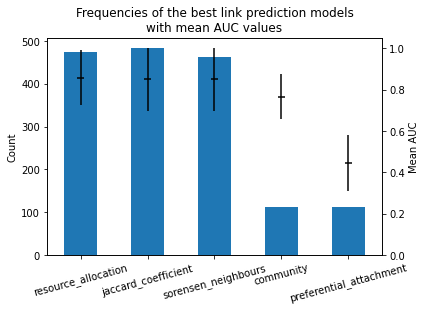

In [4]:
stats['count'].plot(kind='bar')
plt.ylabel('Count')
stats['mean'].plot(kind='bar', secondary_y=True, yerr=stats['std'], xerr=[0.05]*len(link_prediction_methods), color='none', rot=15)
plt.ylabel('Mean AUC')
plt.title('Frequencies of the best link prediction models\nwith mean AUC values')